In [35]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import cmocean

import xbudget
import regionate
import xwmt
import xwmb
import xgcm

In [3]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds = xr.open_mfdataset(f"{hfdrake_path}/data/WMT_monthly/ocean_month_rho2.018601-019012.thetao.nc", chunks={'time':100})

In [4]:
ds

<xarray.Dataset>
Dimensions:     (time: 60, nv: 2, rho2_i: 75, rho2_l: 74, yh: 1080, xh: 1440)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * rho2_i      (rho2_i) float64 997.0 1.011e+03 ... 1.038e+03 1.039e+03
  * rho2_l      (rho2_l) float64 1.004e+03 1.014e+03 ... 1.038e+03 1.038e+03
  * time        (time) object 0186-01-16 12:00:00 ... 0190-12-16 12:00:00
  * xh          (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh          (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    thetao      (time, rho2_l, yh, xh) float32 dask.array<chunksize=(60, 74, 1080, 1440), meta=np.ndarray>
    time_bnds   (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
Attributes:
    filename:            ocean_month_rho2.018601-019012.thetao.nc
    title:               CM4_piControl_C_restartyear148
    associated_files:    areacello: 01860101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello

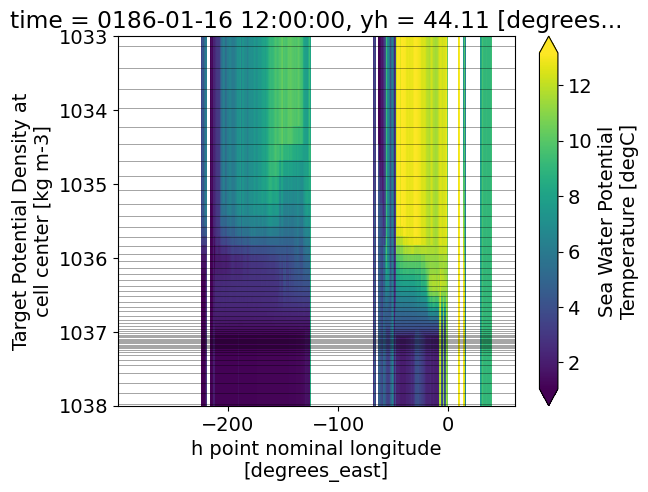

In [32]:
ds.thetao.isel(time=0, yh=700).plot(robust = True)
plt.ylim(1038, 1033)
for rho2 in ds.rho2_i:
    plt.axhline(rho2, color = 'k', lw = '0.5', alpha = 0.5)